# Employee Performance Rating Prediction:

### Import necessary Libraries




In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit,cross_validate,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score
from xgboost import XGBClassifier ,plot_importance,plot_tree
from collections import Counter
from sklearn.feature_selection import SelectFromModel,VarianceThreshold,SelectKBest,f_classif,mutual_info_classif

%matplotlib inline

### Load the dataframe





> We are loading the data into a dataframe and are viewing the results

In [2]:
data = pd.read_csv('HR-Data/data.txt',index_col='Unnamed: 0')

In [3]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


### Hypothesis 

> Null Hypothesis : There is no impact of `EnvironmentSatisfaction` to the Performance rating of an employee
> Alternate Hypothesis : There is a difference in EmpEnvironmentSatisfaction between the employees w.r.t Performance rating
       
    From EDA we can say that EmpEnvironmentSatisfaction does play a significant role in determinig the rating of an employee. Hence we reject the null hypothesis.
    
> Null Hypothesis : `YearsSinceLastPromotion` has nothing to do in predicting the Performance Rating 
> Alternate Hypothesis : Promotion does have a saying in describing the rating of an employee
    
    From EDA we can say that employee when promoted have exhibited good performance rating when compared to not promoted for a prolonged years of time.
    
    

### EDA

In [4]:
# Analysing department wise average performance rating.
pd.DataFrame(data.groupby(['EmpDepartment'])['PerformanceRating'].mean())

,PerformanceRating
EmpDepartment,
Data Science,3.050000
Development,3.085873
Finance,2.775510
Human Resources,2.925926
Research & Development,2.921283
Sales,2.860590


> It can be inferred that, if we consider department wise on an average scale, then Datascience and Development teams are portraying better ratings when compared to other departments

In [5]:
# Analysing department wise average rating.
pd.DataFrame(data.groupby(['EmpDepartment','PerformanceRating']).mean())

Age  DistanceFromHome  \
EmpDepartment          PerformanceRating                                
Data Science           2                  40.000000          2.000000   
                       3                  38.294118          9.764706   
                       4                  34.500000         12.500000   
Development            2                  35.153846         10.615385   
                       3                  36.927632          8.953947   
                       4                  35.204545          7.113636   
Finance                2                  39.466667         14.733333   
                       3                  34.900000         10.800000   
                       4                  36.000000          9.250000   
Human Resources        2                  39.100000          4.500000   
                       3                  38.368421          9.947368   
                       4                  37.666667          7.500000   
Research & Development 2                  38.014706          9.691176   
                       3                  37.282051          9.064103   
                       4                  37.682927          9.414634   
Sales                  2                  37.574713          9.689655   
                       3                  36.031873          9.063745   
                       4                  36.714286          8.542857   

                                          EmpEducationLevel  \
EmpDepartment          PerformanceRating                      
Data Science           2                           2.000000   
                       3                           2.823529   
                       4                           2.500000   
Development            2                           2.076923   
                       3                           2.878289   
                       4                           2.909091   
Finance                2                           3.200000   
                       3                           3.066667   
                       4                           2.500000   
Human Resources        2                           3.000000   
                       3                           3.052632   
                       4                           2.666667   
Research & Development 2                           2.720588   
                       3                           2.923077   
                       4                           2.853659   
Sales                  2                           2.954023   
                       3                           2.884462   
                       4                           3.057143   

                                          EmpEnvironmentSatisfaction  \
EmpDepartment          PerformanceRating                               
Data Science           2                                    1.000000   
                       3                                    3.058824   
                       4                                    3.000000   
Development            2                                    1.461538   
                       3                                    2.726974   
                       4                                    2.954545   
Finance                2                                    1.600000   
                       3                                    3.333333   
                       4                                    3.750000   
Human Resources        2                                    1.600000   
                       3                                    2.842105   
                       4                                    3.000000   
Research & Development 2                                    1.602941   
                       3                                    3.038462   
                       4                                    3.219512   
Sales                  2                                    1.586207   
                       3      

> <br>1. If we look at Data Sciencec,Finance, HR, R&D and Sales department then on an average, employees of higher age group were performing poorer when compare to the younger employees in those respective department <br><br>2. Looking at the EnvironmentSatisfaction then we can say that a common pattern exixts among all 2 rating employees. i.e they are not satisfied with the office environment.  Hence if the organization can deal with this problem then there might be chances of employees improving themselves to a  better rating <br><br>3. In most of the departments employees with higher salary hike percentage exhibited ratings of 3 and 4. in contrary 2 raitngs were seen among employees with less salary hike <br><br>4. Employees who stayed for a larger duration in the company were most likely falling under 2 rating category. Hence a reterospective is needed in this scenario. <br><br>5. Also employees who were performing the same job role for more number of years were observed to be having a 2 rating. Hence as a turn around if atall their current role is changed over a period of time then we can expect a decline in 2 ratings.

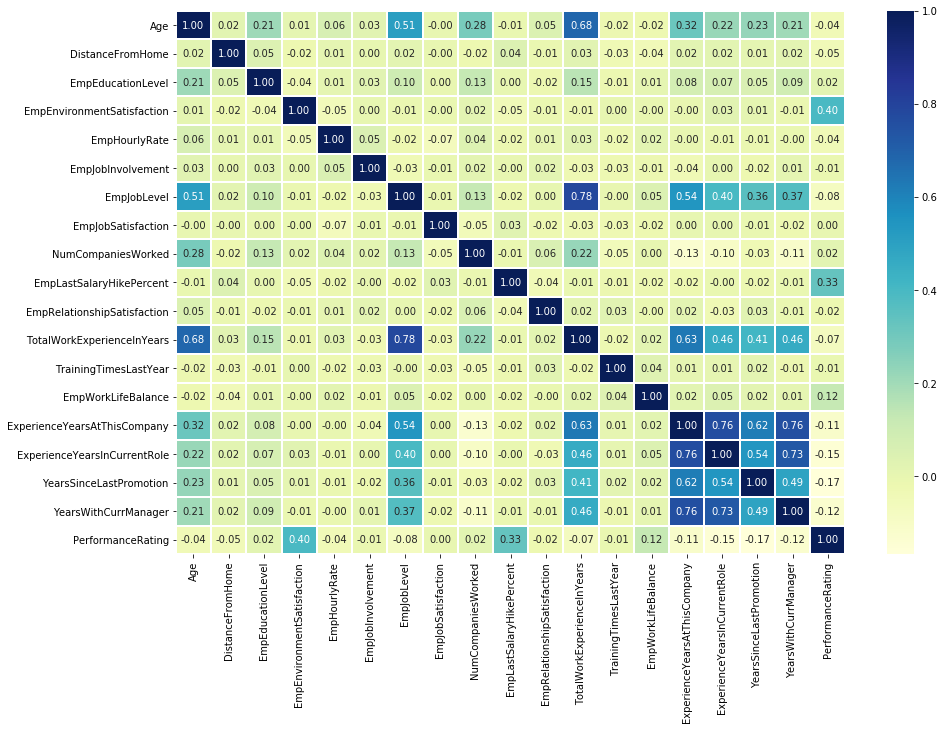

In [6]:
fig, ax = plt.subplots(figsize=(15,10))  
_=sns.heatmap(data.corr(),cmap="YlGnBu", annot=True,linewidths=1, fmt=".2f",ax=ax)

> Through below correlation heatmap it's clear that only medium strength relationship exists between our predictors and target variable

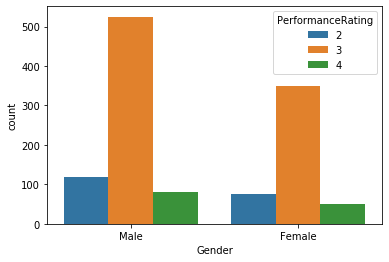

In [7]:
_=sns.countplot(x=data.Gender,data=data,hue=data.PerformanceRating)

In [8]:
pie = data.groupby('PerformanceRating').agg('count')
pie

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,194,194,194,194,194,194,194,194,194,194,...,194,194,194,194,194,194,194,194,194,194
3,874,874,874,874,874,874,874,874,874,874,...,874,874,874,874,874,874,874,874,874,874
4,132,132,132,132,132,132,132,132,132,132,...,132,132,132,132,132,132,132,132,132,132


In [9]:
pie[pie.columns[0]].sort_values()

PerformanceRating
4    132
2    194
3    874
Name: EmpNumber, dtype: int64

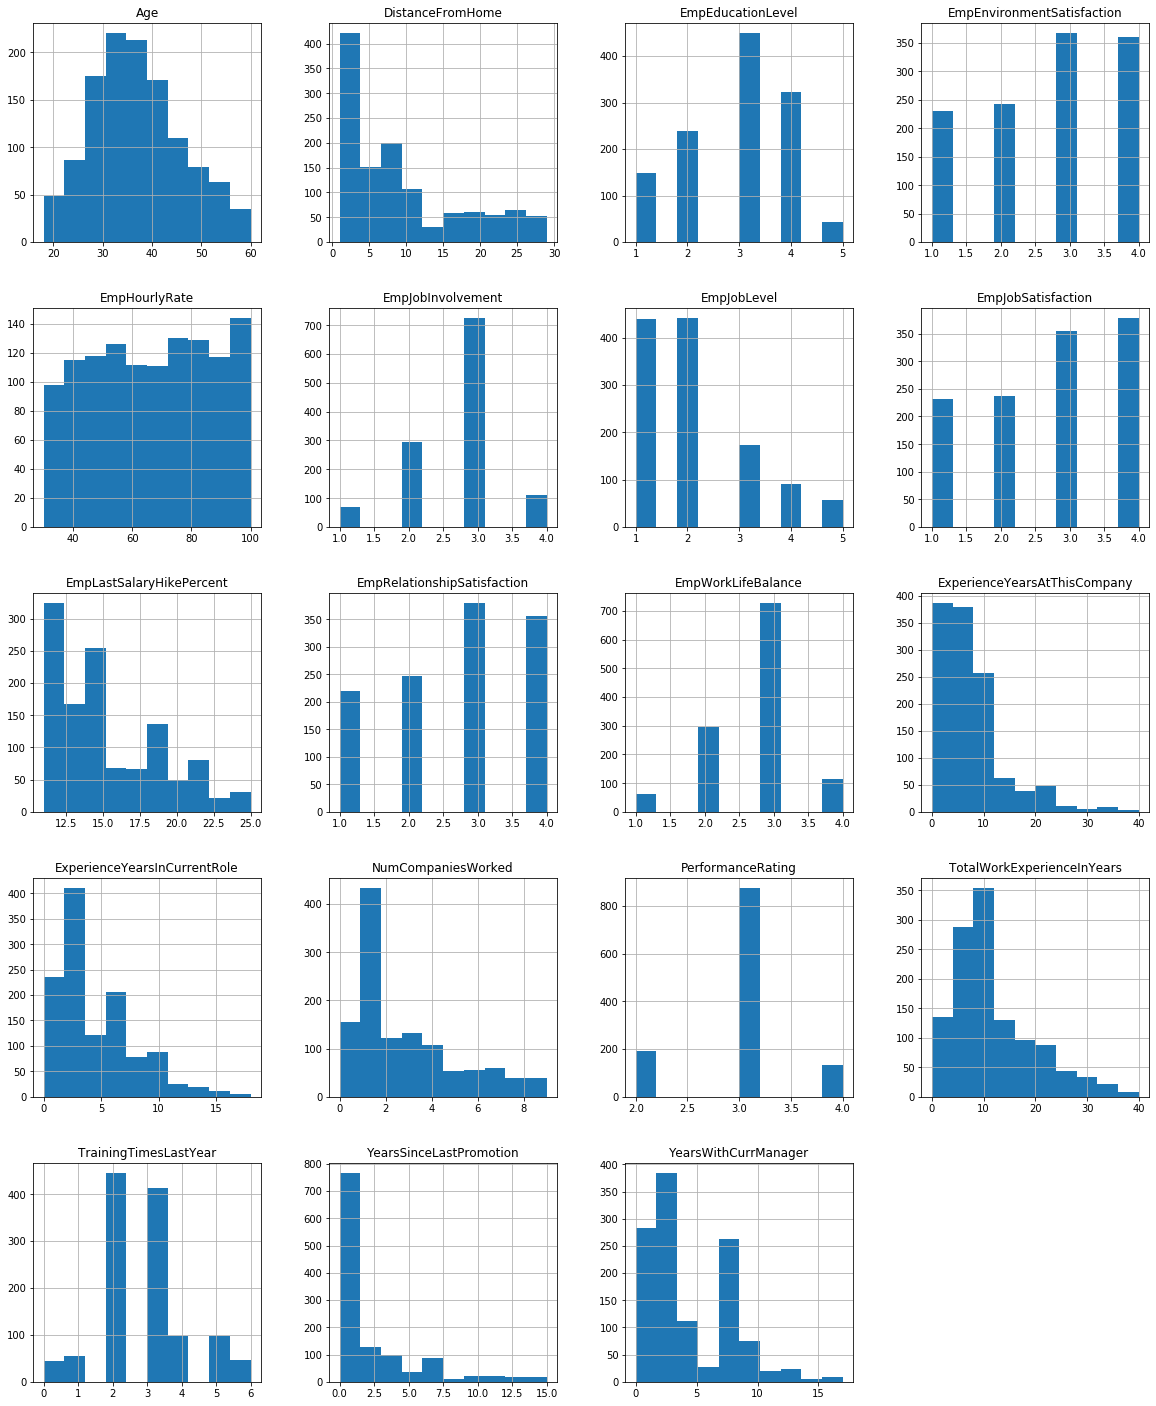

In [10]:
_=data.hist(figsize=(20,25))

> <br>1.  We can depict that the organization has employees greater than 30 yrs of age. Many of them are in range of 30-40, which is a positive sign as it has considerable amount of younger generation. <br><br>2.  Interesting thing that can be noticed is, most of the employees are closer to the office loation.Only few are far away. <br><br>3.  Even though the company has diverse set of education levels, Bachelor's and Master's degree are the most popular degree among employees. <br><br>4.  Most of the employees got hike of range between 11% to 15%. <br><br>5.  Once an employee is joining this institution, then we can say that he or she will stay for a longer duration of time as most of the employees are staying till 10yrs in this company. <br><br>6.  Employees who switched to this company as their 2nd organiztion in their career are in higher count when compared to others. <br><br>7.  On an average employee is getting promoted for a period of 2 yrs

In [11]:
def performance_analysis(columns):
    
    fig=plt.subplots(figsize=(30,60))             
    for i, j in enumerate(columns):
        plt.subplot(6, 2, i+1)
        plt.subplots_adjust(hspace = 0.5)
        sns.countplot(x=j,data = data, hue='PerformanceRating')
        plt.xticks(rotation=40)
    return 

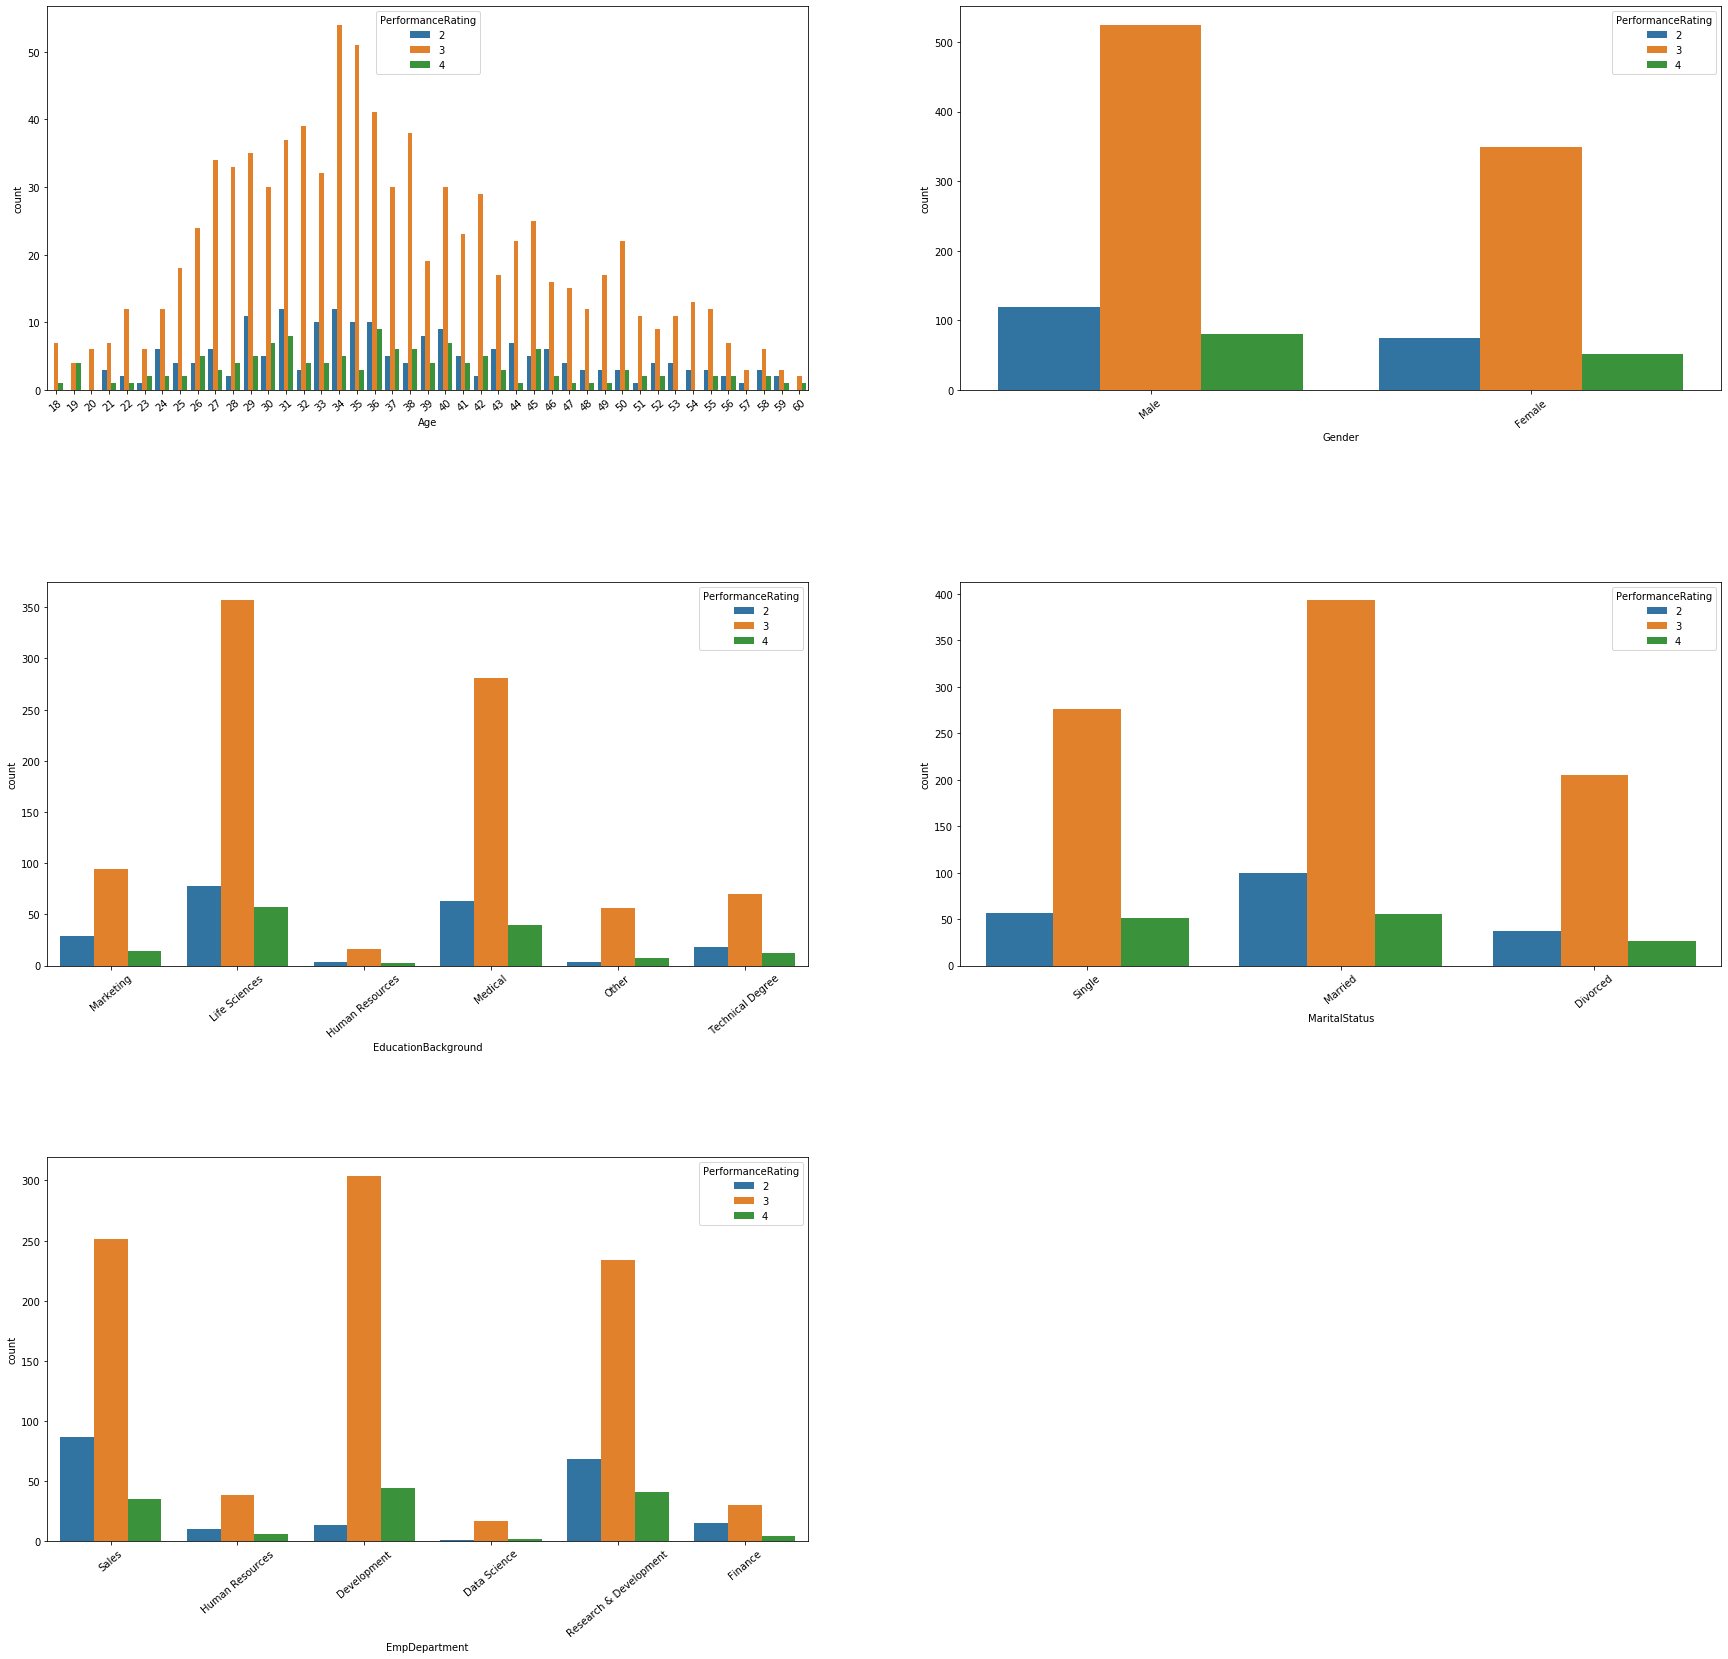

In [12]:
performance_analysis(data.columns[1:6])

> <br>1. Male workforece is greater when compared to Female work force and when compared to rating then male's are outperfoming when compared to their female counterpart. <br><br>2. When looked through marital status perspetive a married person has larger count of performance rating-2 when compared to others. <br><br>3. If seen through departmenal perspective then Sales and Research & Development dept have high count of low rating values. Hence special attention needs to be given here.

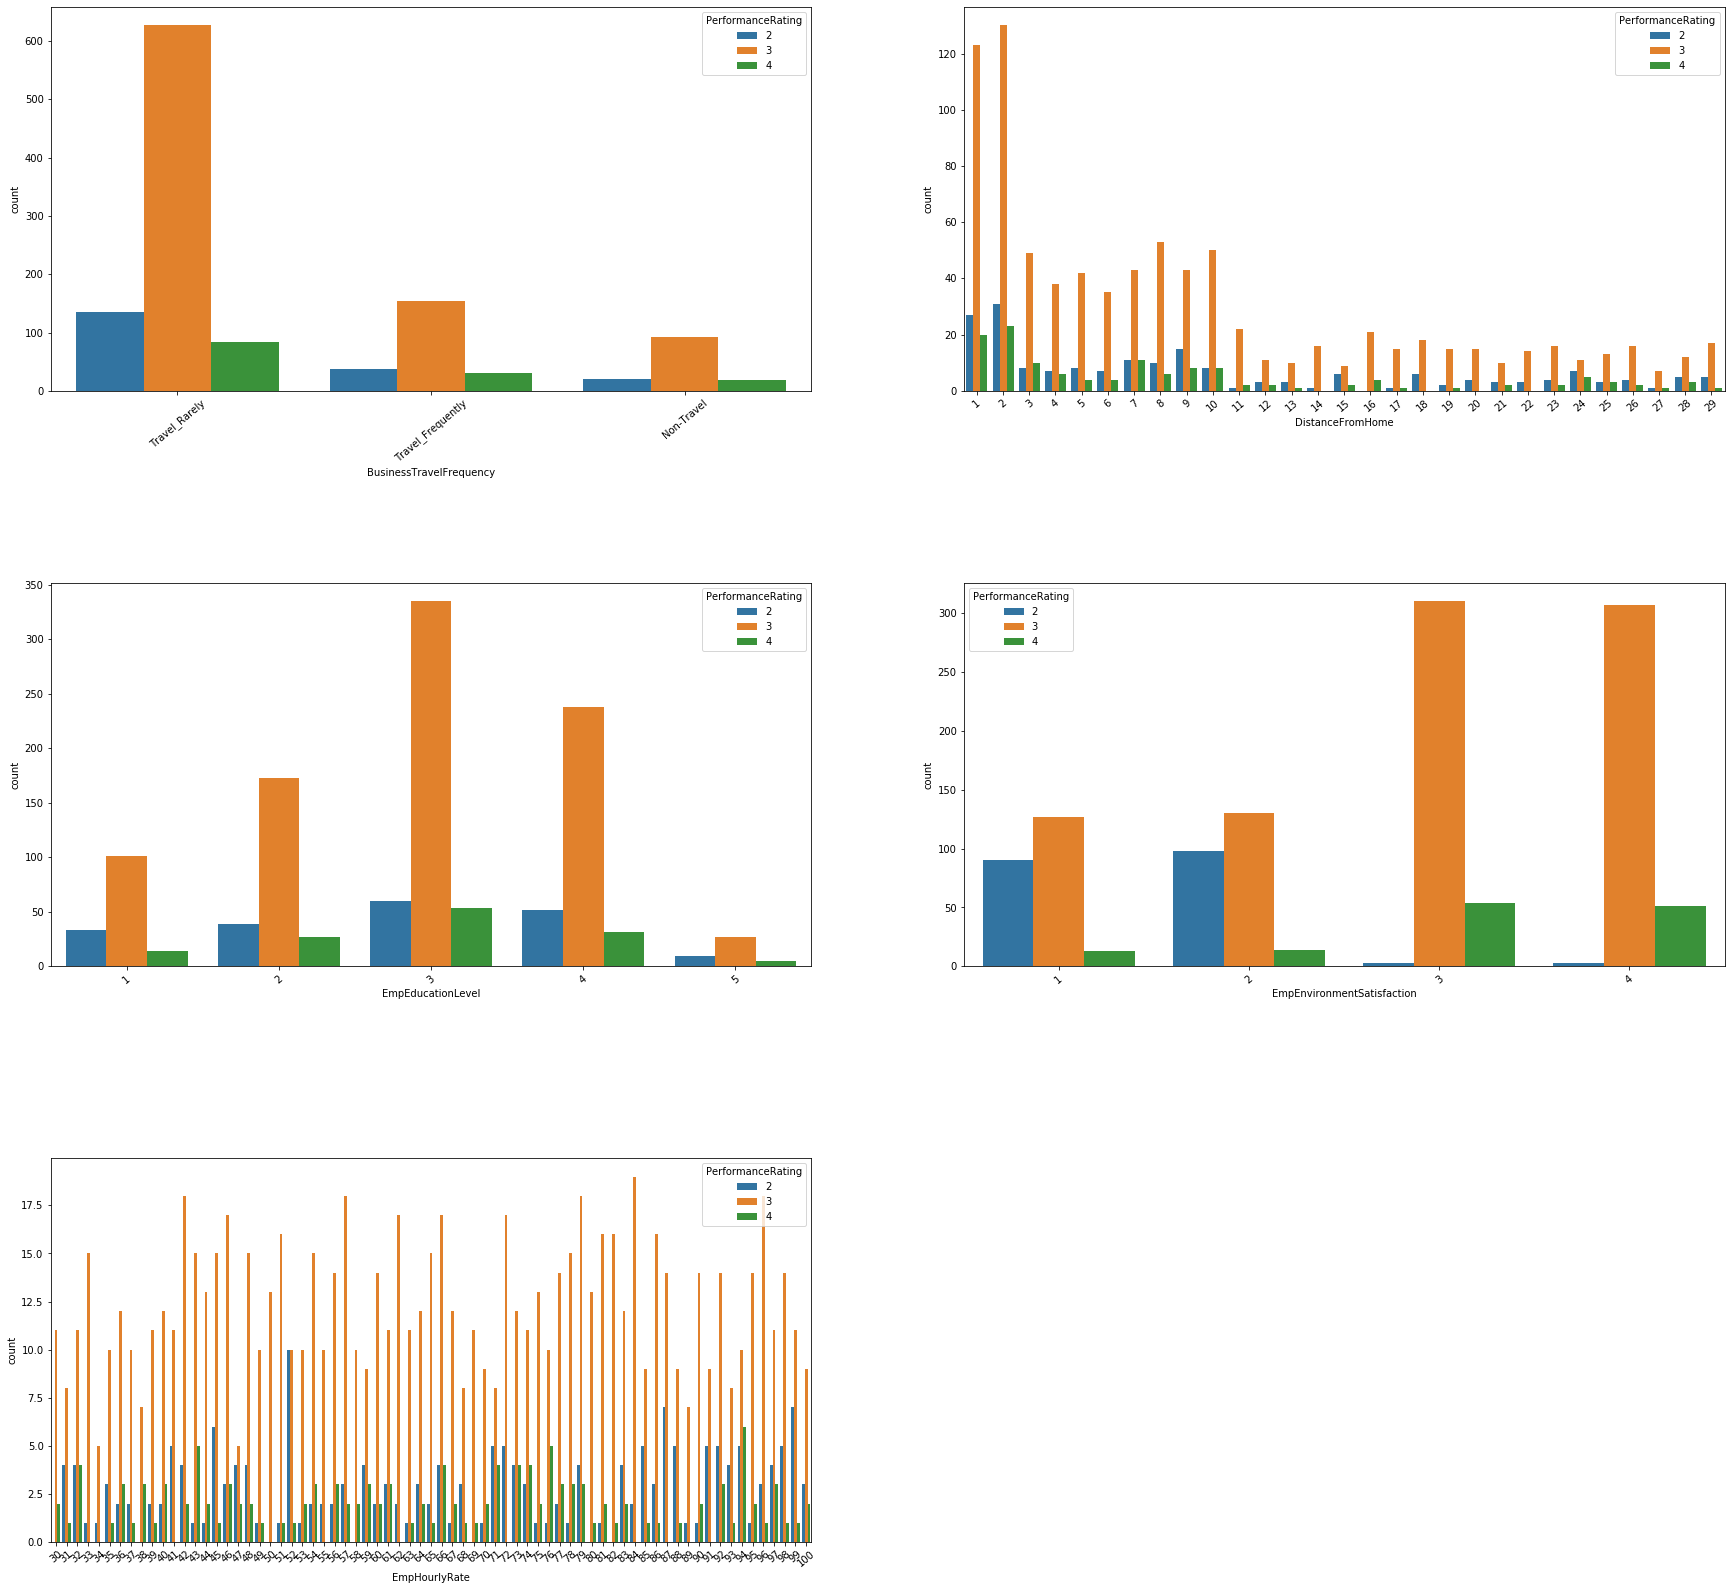

In [13]:
performance_analysis(data.columns[7:12])

> <br>1. If seen through ratio wise then empoyees with lower education level exhibited more poor performance rating when compared to others. <br><br>2. As environment satisfaction increasese the performance ratings also gradually increasd with little poor performers. Vice_Versa to lower environment satisfaction.

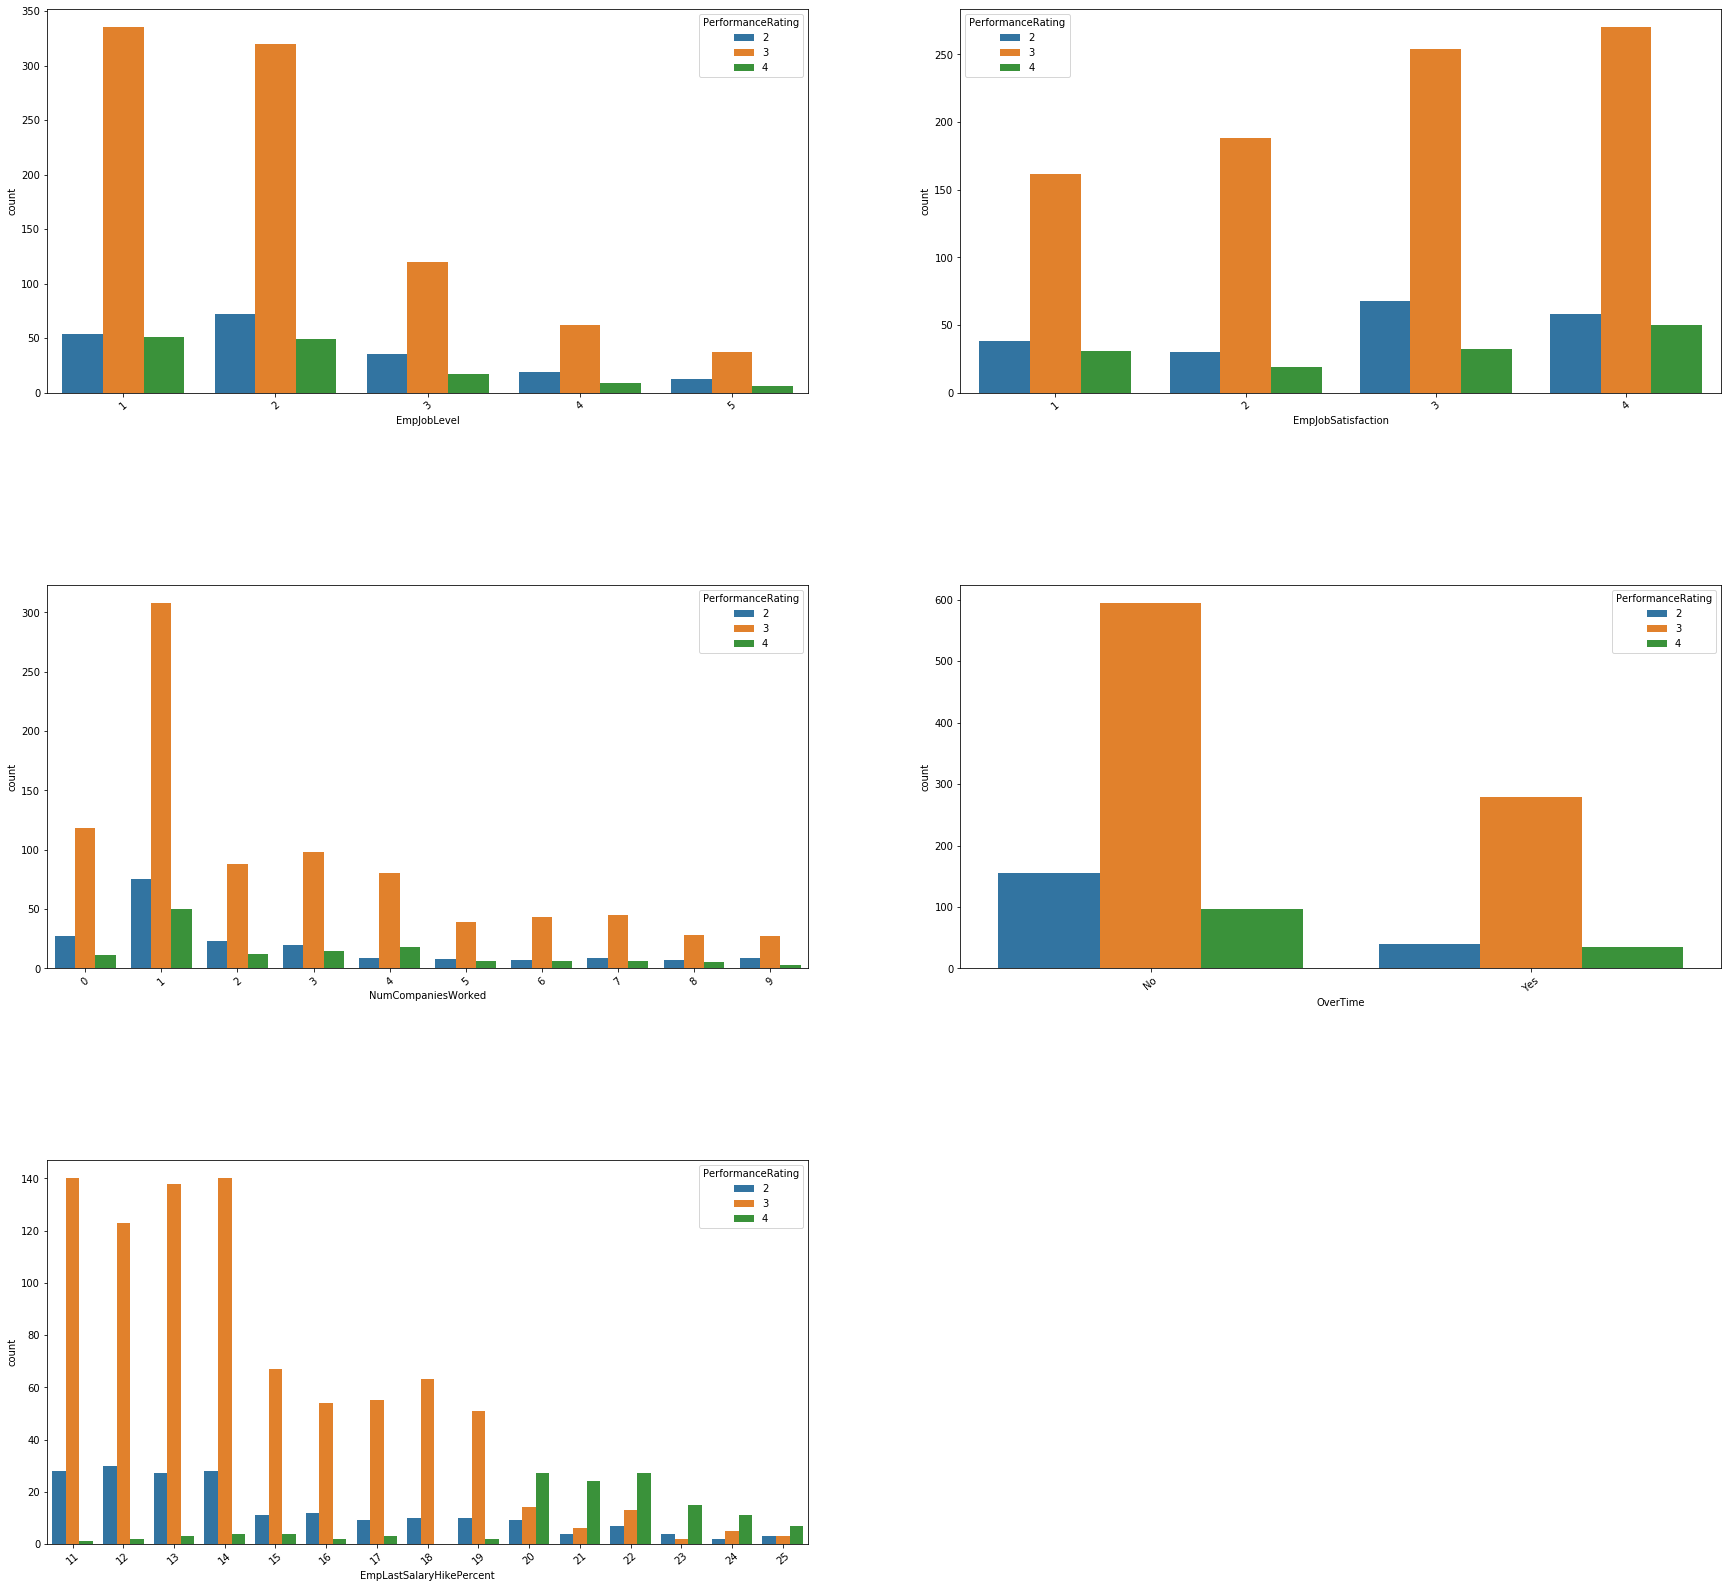

In [14]:
performance_analysis(data.columns[13:18])

> <br>1. One important info to be noticed is eventhough the employee is satisfied with his jobrole, there is greater increase of poor performers when compared to others who are no that satisfied with the assigned job. <br><br>2. If employee hike is greater than 20% then all of those employees outperformed when compared to the employees with lower salary hike percentage.

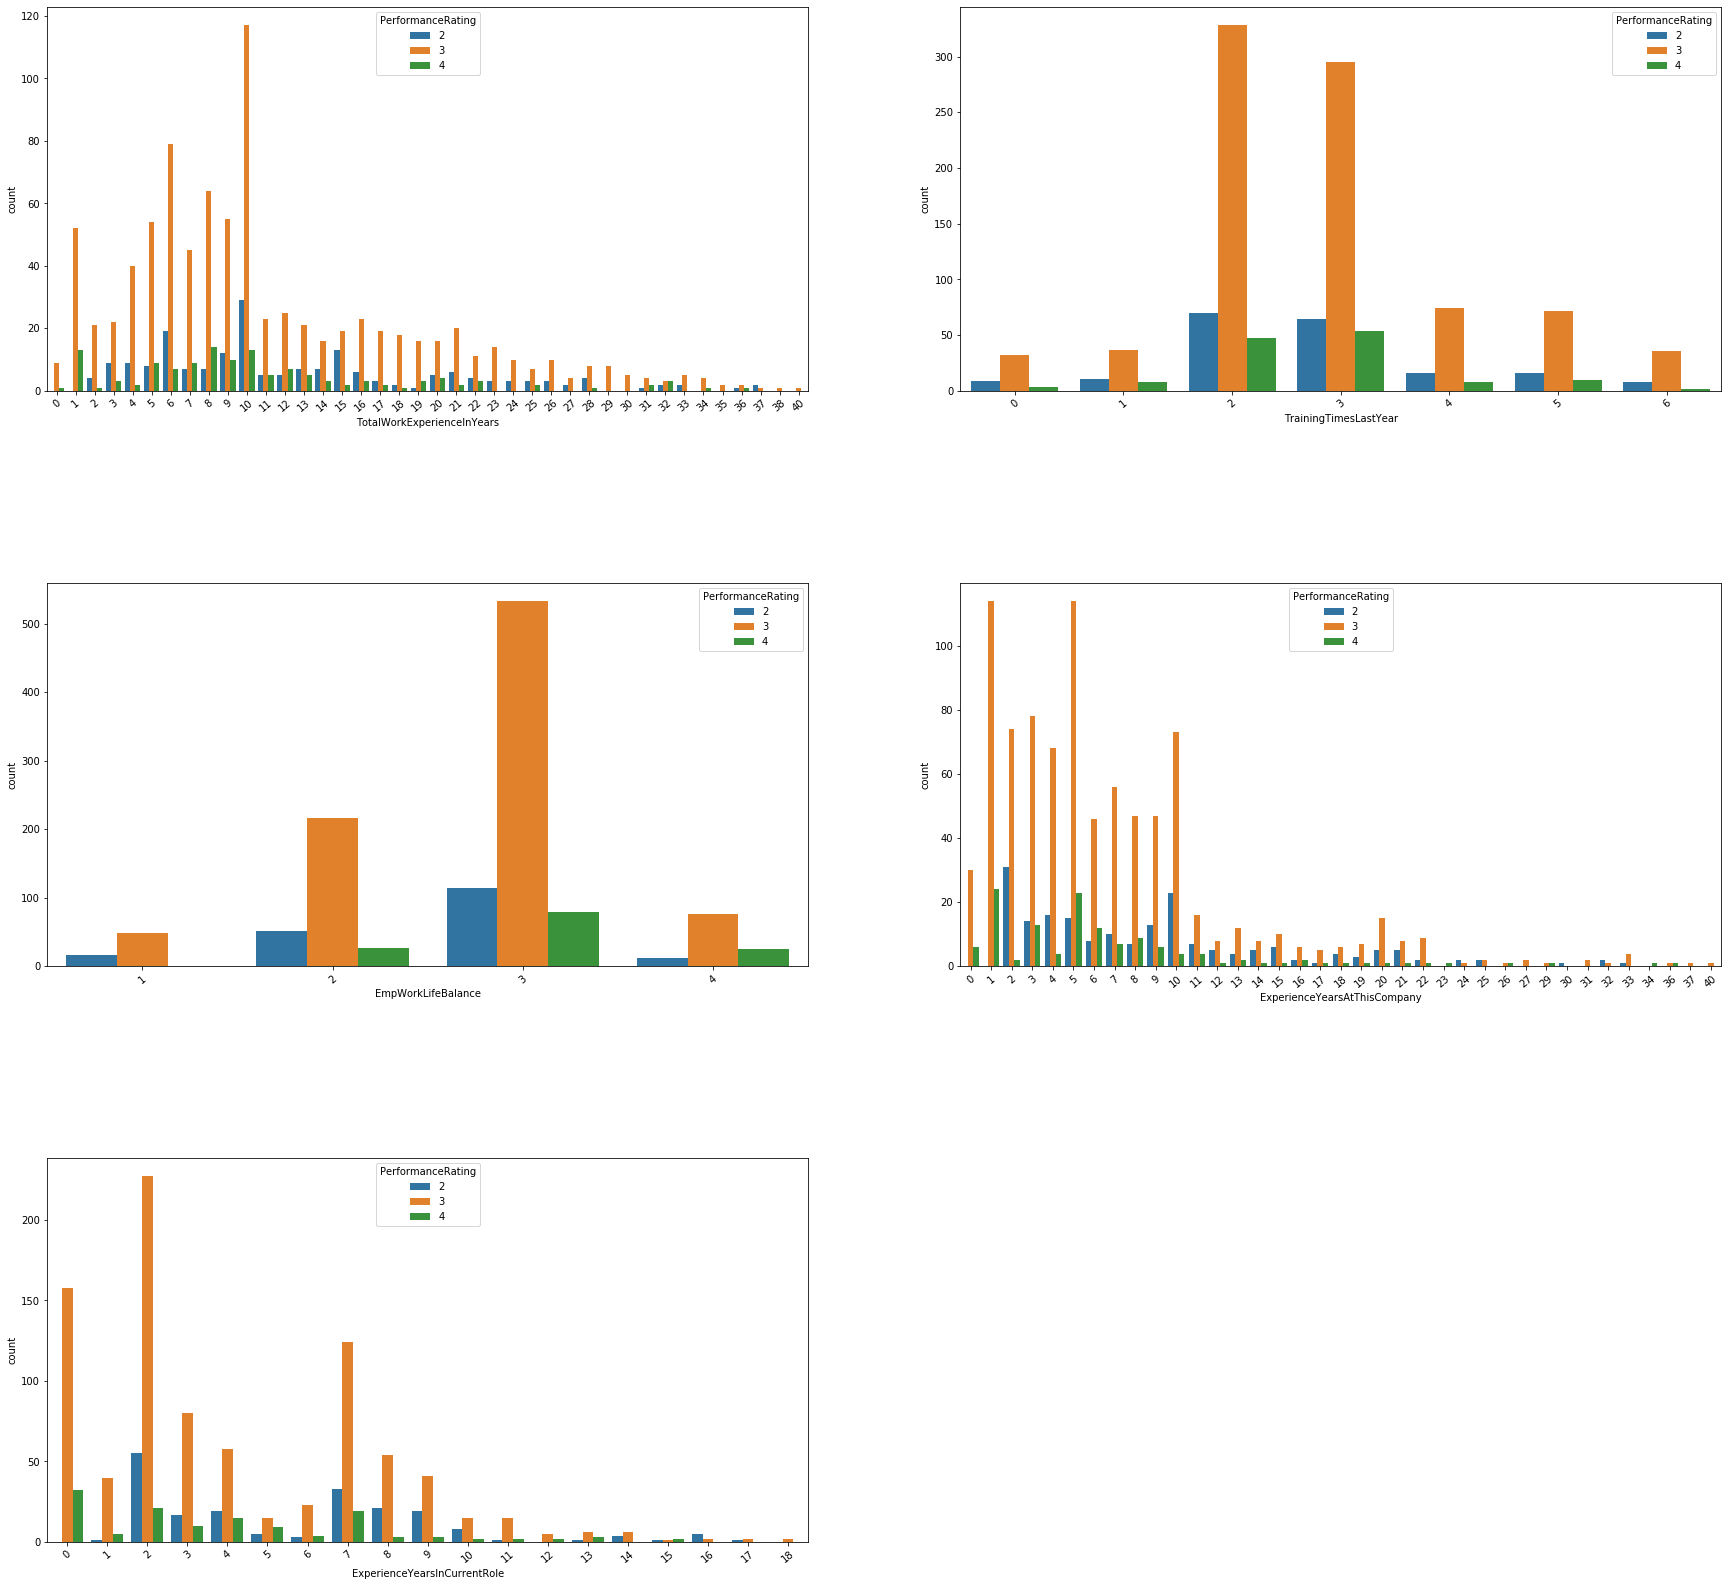

In [15]:
performance_analysis(data.columns[19:24])

> <br>1. Freshers till 2yrs of experience exhibited good perormance rating and after that rating 2 count people gradually increased. <br><br>2. As the training time given to employee is confined to minimal time then the employees were seen exhibiting better performance when compared to more trainings. <br><br>3. If employees are not assigned different role (or) if continuing in same role for more than 2 years then there is a drastic change in performance rating.

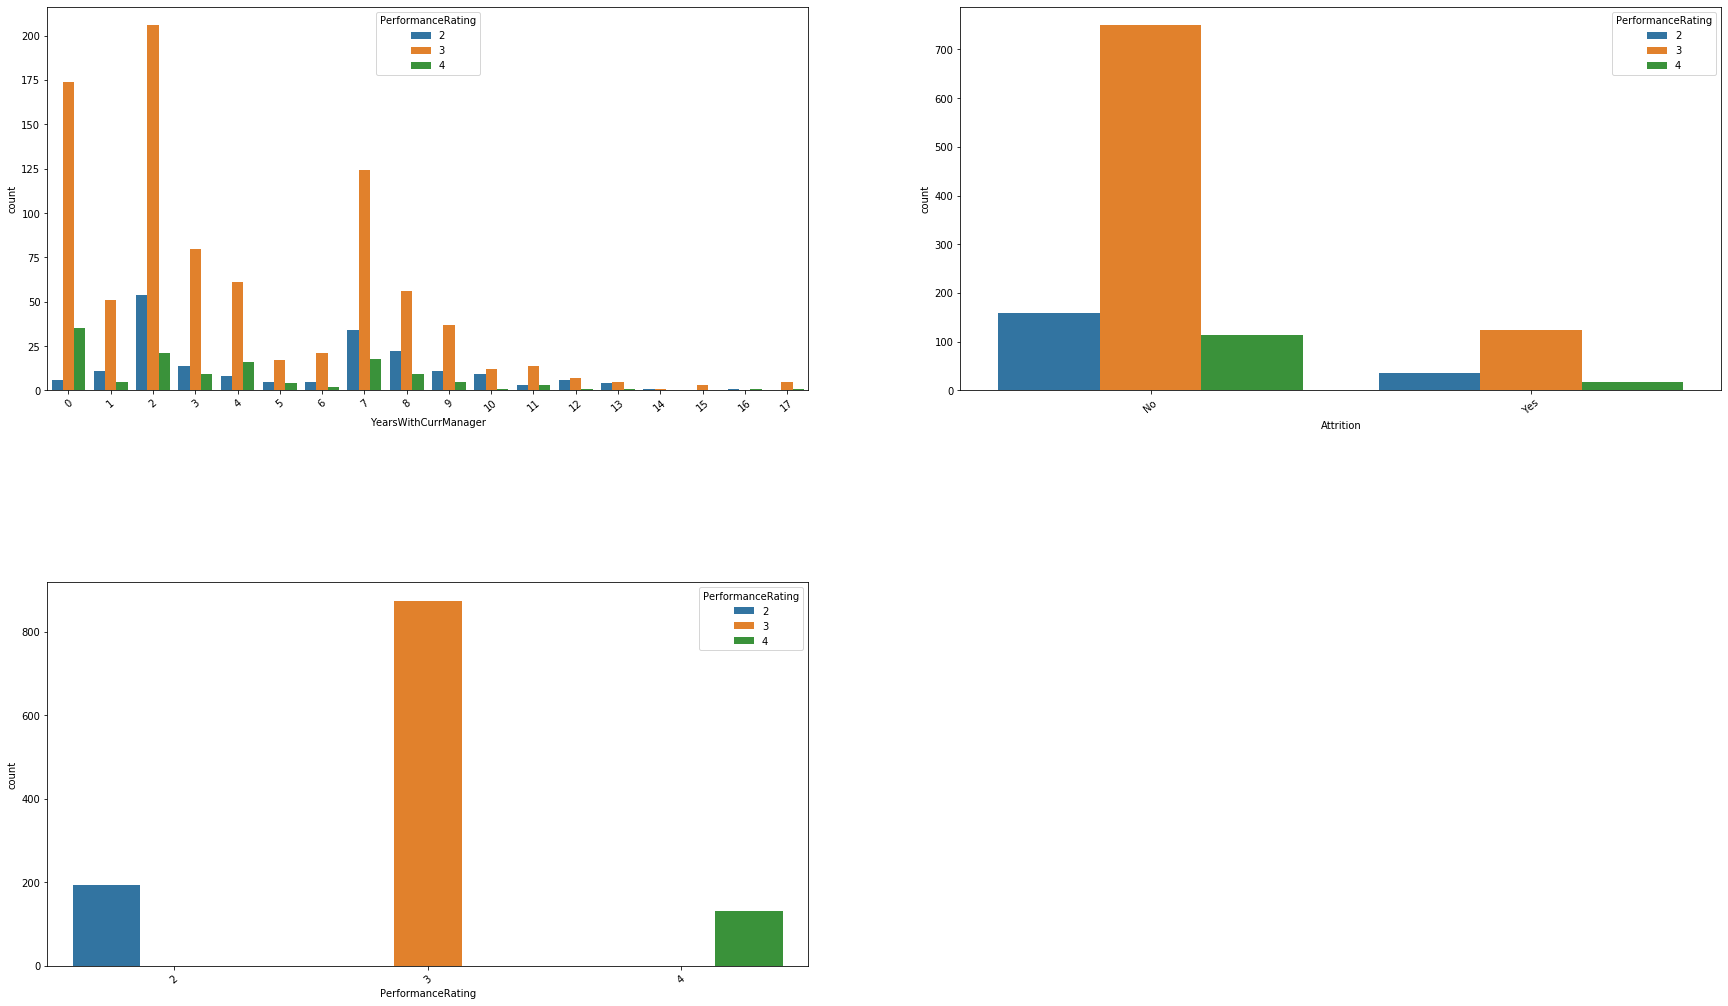

In [16]:
performance_analysis(data.columns[25:])

### Descriptive Statistics

In [17]:
data.head(2)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3


In [18]:
data.drop(columns='EmpNumber',inplace=True)

In [19]:
# Performing sanity check whether the data has any null values or not
data.isnull().any().all()

False

In [20]:
# Making sure all the data columns are assigned of sensible data type
data.dtypes

Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager             int64
Attrition                

In [21]:
# Checking if there is any missing data in our dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1199
Data columns (total 27 columns):
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
EmpLastSalaryHikePercent        1200 non-null int64
Em

In [22]:
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [23]:
data.describe(include='O')

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200
unique,2,6,3,6,19,3,2,2
top,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,725,492,548,373,270,846,847,1022


### Converting categorical data to numeric data

In [24]:
# We shall convert categorical data to numerical data

enc= LabelEncoder()
data.Gender = enc.fit_transform(data.Gender)
data.EducationBackground = enc.fit_transform(data.EducationBackground)
data.MaritalStatus = enc.fit_transform(data.MaritalStatus)
data.EmpDepartment = enc.fit_transform(data.EmpDepartment)
data.EmpJobRole = enc.fit_transform(data.EmpJobRole)
data.BusinessTravelFrequency = enc.fit_transform(data.BusinessTravelFrequency)
data.OverTime = enc.fit_transform(data.OverTime)
data.Attrition = enc.fit_transform(data.Attrition)

In [25]:
data.head(2)

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3


### Dividing the data to train and test sets

In [26]:
# We divide the dataset to independent and dependent variables

x= data.iloc[:,0:-1]
y= data.PerformanceRating

In [27]:
print(x.shape, y.shape)

(1200, 26) (1200,)


In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 9, test_size = 0.3)

In [29]:
# We can see that the distribution is not even through normal train test splitt.

print('shape of x_train data : {}  shape of y_train data : {}'.format(x_train.shape,y_train.shape))
print('shape of x_test  data : {}  shape of y_test  data : {}'.format(x_test.shape,y_test.shape))
print('Training Classifier Ratio: {}'.format(Counter(y_train)))
print('Testing Classifier Ratio: {}'.format(Counter(y_test)))

print()
print('y training distributions in % :\n\n{}'.format(y_train.value_counts(normalize=True) *100))
print()
print('y testing distributions in % :\n\n{}'.format(y_test.value_counts(normalize=True)*100))

shape of x_train data : (840, 26)  shape of y_train data : (840,)
shape of x_test  data : (360, 26)  shape of y_test  data : (360,)
Training Classifier Ratio: Counter({3: 611, 2: 141, 4: 88})
Testing Classifier Ratio: Counter({3: 263, 2: 53, 4: 44})

y training distributions in % :

3    72.738095
2    16.785714
4    10.476190
Name: PerformanceRating, dtype: float64

y testing distributions in % :

3    73.055556
2    14.722222
4    12.222222
Name: PerformanceRating, dtype: float64


### Train Test split using cross validation (StratifiedShuffleSplit) 

In [30]:
# As our target data has huge imbalance, stratified shuffle splitt has been choosen for representing better class balance.
# Hence we are not opting these cv techniques (k fold / shuffle splitt)

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state= 1)

for train, test in cv.split(x,y):
    x_train_cv, x_test_cv = x.iloc[train],x.iloc[test]
    y_train_cv, y_test_cv = y.iloc[train],y.iloc[test]

In [31]:
# We can see that the distribution is even when compared to just train test splitt

print('shape of x_train_cv data : {}  shape of y_train_cv data : {}'.format(x_train_cv.shape,y_train_cv.shape))
print('shape of x_test_cv  data : {}  shape of y_test_cv  data : {}'.format(x_test_cv.shape,y_test_cv.shape))
print('Training Classifier Ratio: {}'.format(Counter(y_train_cv)))
print('Testing Classifier Ratio: {}'.format(Counter(y_test_cv)))
print()
print('y training distributions:\n\n{}'.format(y_train_cv.value_counts(normalize=True)))
print()
print('y testing distributions:\n\n{}'.format(y_test_cv.value_counts(normalize=True)))


shape of x_train_cv data : (960, 26)  shape of y_train_cv data : (960,)
shape of x_test_cv  data : (240, 26)  shape of y_test_cv  data : (240,)
Training Classifier Ratio: Counter({3: 699, 2: 155, 4: 106})
Testing Classifier Ratio: Counter({3: 175, 2: 39, 4: 26})

y training distributions:

3    0.728125
2    0.161458
4    0.110417
Name: PerformanceRating, dtype: float64

y testing distributions:

3    0.729167
2    0.162500
4    0.108333
Name: PerformanceRating, dtype: float64


### Model evauations using Train-Test splitt.

In [32]:
# Training the model with Logistic Regression

LR = LogisticRegression(random_state=2)
LR.fit(x_train,y_train)
y_LR_predict = LR.predict(x_test)

print("Accuracy :",accuracy_score(y_test,y_LR_predict))
print(classification_report(y_test,y_LR_predict))
pd.crosstab(y_test,y_LR_predict)

Accuracy : 0.7972222222222223
              precision    recall  f1-score   support

           2       0.65      0.45      0.53        53
           3       0.83      0.92      0.87       263
           4       0.67      0.45      0.54        44

    accuracy                           0.80       360
   macro avg       0.71      0.61      0.65       360
weighted avg       0.78      0.80      0.78       360



C:\Users\varun\Anaconda3\envs\AI\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


col_0,2,3,4
PerformanceRating,,,
2,24,27,2
3,12,243,8
4,1,23,20


In [33]:
# Training the model with SVM

svm = LinearSVC(random_state=2)
svm.fit(x_train,y_train)
y_svm_predict = svm.predict(x_test)

print("Accuracy :",accuracy_score(y_test,y_svm_predict))
print(classification_report(y_test,y_svm_predict))
pd.crosstab(y_test,y_svm_predict)

Accuracy : 0.7416666666666667
              precision    recall  f1-score   support

           2       1.00      0.02      0.04        53
           3       0.77      0.96      0.85       263
           4       0.47      0.32      0.38        44

    accuracy                           0.74       360
   macro avg       0.74      0.43      0.42       360
weighted avg       0.76      0.74      0.67       360



C:\Users\varun\Anaconda3\envs\AI\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


col_0,2,3,4
PerformanceRating,,,
2,1,47,5
3,0,252,11
4,0,30,14


In [34]:
# Training the model with Decision Tree

DT = DecisionTreeClassifier(random_state=2)
DT.fit(x_train,y_train)
y_DT_predict = DT.predict(x_test)

print("Accuracy :",accuracy_score(y_test,y_DT_predict))
print(classification_report(y_test,y_DT_predict))
pd.crosstab(y_test,y_DT_predict)

Accuracy : 0.875
              precision    recall  f1-score   support

           2       0.73      0.72      0.72        53
           3       0.92      0.92      0.92       263
           4       0.77      0.82      0.79        44

    accuracy                           0.88       360
   macro avg       0.81      0.82      0.81       360
weighted avg       0.88      0.88      0.88       360



col_0,2,3,4
PerformanceRating,,,
2,38,13,2
3,13,241,9
4,1,7,36


In [35]:
# Training the model with Random Forest

RF = RandomForestClassifier(random_state=2)
RF.fit(x_train,y_train)
y_RF_predict = RF.predict(x_test)

print("Accuracy :",accuracy_score(y_test,y_RF_predict))
print(classification_report(y_test,y_RF_predict))
pd.crosstab(y_test,y_RF_predict)

Accuracy : 0.9194444444444444
              precision    recall  f1-score   support

           2       0.88      0.87      0.88        53
           3       0.93      0.97      0.95       263
           4       0.91      0.70      0.79        44

    accuracy                           0.92       360
   macro avg       0.91      0.85      0.87       360
weighted avg       0.92      0.92      0.92       360



col_0,2,3,4
PerformanceRating,,,
2,46,7,0
3,6,254,3
4,0,13,31


In [36]:
# Training the model with XG Boost classifier

XG = XGBClassifier(random_state=2)
XG.fit(x_train,y_train)
y_XG_predict = XG.predict(x_test)

print("Accuracy :",accuracy_score(y_test,y_XG_predict))
print(classification_report(y_test,y_XG_predict))
pd.crosstab(y_test,y_XG_predict)

Accuracy : 0.9277777777777778
              precision    recall  f1-score   support

           2       0.85      0.87      0.86        53
           3       0.94      0.96      0.95       263
           4       0.92      0.82      0.87        44

    accuracy                           0.93       360
   macro avg       0.91      0.88      0.89       360
weighted avg       0.93      0.93      0.93       360



col_0,2,3,4
PerformanceRating,,,
2,46,7,0
3,8,252,3
4,0,8,36


### Comparision of Train-Test splitt classifiers

> It can be noticed from the results that XGBoost classifier has outperformed when compared to other models. But still the results can be improved by using cross validation technique

In [37]:
classifiers = [("Logistic Regression", LR),
               ("Support Vector Machine", svm),
               ("Decision Tree", DT),
               ("Random Forest", RF),                 
               ("XGBoost", XG)]

Precision = []
Recall = []
F1_score = []

for name, classifier in classifiers:
    classifier.fit(x_train, y_train)
    y_predict = classifier.predict(x_test)
    
    temp_precision = precision_score(y_test,y_predict,average='weighted')
    temp_recall    = recall_score(y_test,y_predict,average='weighted')
    temp_f1_score  = f1_score(y_test,y_predict,average='weighted')
    
    print("For "+ name +", precision, recall, and F1 were:")
    print('Precision:',temp_precision)
    print('Recall   :',temp_recall)
    print('F1 score :',temp_f1_score)  
    print("")
    
    Precision.append(temp_precision)
    Recall.append(temp_recall)
    F1_score.append(temp_f1_score)

C:\Users\varun\Anaconda3\envs\AI\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


For Logistic Regression, precision, recall, and F1 were:
Precision: 0.7828643489906288
Recall   : 0.7972222222222223
F1 score : 0.7831637212752321



C:\Users\varun\Anaconda3\envs\AI\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


For Support Vector Machine, precision, recall, and F1 were:
Precision: 0.7638337273443656
Recall   : 0.7416666666666667
F1 score : 0.673658380602825

For Decision Tree, precision, recall, and F1 were:
Precision: 0.8757767782926745
Recall   : 0.875
F1 score : 0.8752637191759329

For Random Forest, precision, recall, and F1 were:
Precision: 0.918903283754078
Recall   : 0.9194444444444444
F1 score : 0.91724854082396

For XGBoost, precision, recall, and F1 were:
Precision: 0.92774514406849
Recall   : 0.9277777777777778
F1 score : 0.9273246704563509



### Model Evaluation using Cross-Validation Techninque

In [38]:
# Comparing the model with cross validation split.

LR_cv = LogisticRegression(random_state=2)
LR_cv.fit(x_train_cv,y_train_cv)
y_LR_predict_cv = LR.predict(x_test_cv)

print("Accuracy :",accuracy_score(y_test_cv,y_LR_predict_cv))
print(classification_report(y_test_cv,y_LR_predict_cv))
pd.crosstab(y_test_cv,y_LR_predict_cv)

Accuracy : 0.7666666666666667
              precision    recall  f1-score   support

           2       0.63      0.44      0.52        39
           3       0.82      0.89      0.85       175
           4       0.50      0.46      0.48        26

    accuracy                           0.77       240
   macro avg       0.65      0.59      0.62       240
weighted avg       0.75      0.77      0.76       240



C:\Users\varun\Anaconda3\envs\AI\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


col_0,2,3,4
PerformanceRating,,,
2,17,20,2
3,10,155,10
4,0,14,12


In [39]:
# Modelling with SVM CV

model_SVM=LinearSVC(random_state=2)
model_SVM.fit(x_train_cv,y_train_cv)
y_predict_SVM_cv = model_SVM.predict(x_test_cv)


print("Accuracy :",accuracy_score(y_test_cv,y_predict_SVM_cv))
print(classification_report(y_test_cv,y_predict_SVM_cv))
pd.crosstab(y_test_cv,y_predict_SVM_cv)


Accuracy : 0.5666666666666667
              precision    recall  f1-score   support

           2       0.40      0.87      0.54        39
           3       0.97      0.44      0.61       175
           4       0.33      0.96      0.50        26

    accuracy                           0.57       240
   macro avg       0.57      0.76      0.55       240
weighted avg       0.81      0.57      0.58       240



C:\Users\varun\Anaconda3\envs\AI\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


col_0,2,3,4
PerformanceRating,,,
2,34,2,3
3,51,77,47
4,1,0,25


In [40]:
# Modelling with Decision Tree CV

model_DT=DecisionTreeClassifier(random_state=2)
model_DT.fit(x_train_cv,y_train_cv)
y_predict_DT_cv = model_DT.predict(x_test_cv)


print("Accuracy :",accuracy_score(y_test_cv,y_predict_DT_cv))
print(classification_report(y_test_cv,y_predict_DT_cv))
pd.crosstab(y_test_cv,y_predict_DT_cv)

Accuracy : 0.8958333333333334
              precision    recall  f1-score   support

           2       0.88      0.74      0.81        39
           3       0.92      0.94      0.93       175
           4       0.75      0.81      0.78        26

    accuracy                           0.90       240
   macro avg       0.85      0.83      0.84       240
weighted avg       0.90      0.90      0.89       240



col_0,2,3,4
PerformanceRating,,,
2,29,9,1
3,4,165,6
4,0,5,21


In [41]:
imp_DT = pd.DataFrame(model_DT.feature_importances_).sort_values(by=0,ascending=False)
imp_DT[:6]

,0
9,0.227637
16,0.216636
23,0.167160
22,0.085939
4,0.085283
20,0.049463


In [42]:
DT_features = [x.columns[i] for i in imp_DT[:6].index]
DT_features

['EmpEnvironmentSatisfaction',
 'EmpLastSalaryHikePercent',
 'YearsSinceLastPromotion',
 'ExperienceYearsInCurrentRole',
 'EmpDepartment',
 'EmpWorkLifeBalance']

In [43]:
# Modelling with Random forest CV

model_RF=RandomForestClassifier(random_state=2)
model_RF.fit(x_train_cv,y_train_cv)
y_predict_RF_cv = model_RF.predict(x_test_cv)


print("Accuracy :",accuracy_score(y_test_cv,y_predict_RF_cv))
print(classification_report(y_test_cv,y_predict_RF_cv))
pd.crosstab(y_test_cv,y_predict_RF_cv)

Accuracy : 0.9166666666666666
              precision    recall  f1-score   support

           2       0.94      0.77      0.85        39
           3       0.92      0.97      0.94       175
           4       0.87      0.77      0.82        26

    accuracy                           0.92       240
   macro avg       0.91      0.84      0.87       240
weighted avg       0.92      0.92      0.91       240



col_0,2,3,4
PerformanceRating,,,
2,30,9,0
3,2,170,3
4,0,6,20


In [44]:
imp_RF = pd.DataFrame(model_RF.feature_importances_).sort_values(by=0,ascending=False)
imp_RF[:6]

,0
16,0.212000
9,0.207254
23,0.095336
22,0.045853
5,0.042004
10,0.036882


In [45]:
RF_features = [x.columns[i] for i in imp_RF[:6].index]
RF_features

['EmpLastSalaryHikePercent',
 'EmpEnvironmentSatisfaction',
 'YearsSinceLastPromotion',
 'ExperienceYearsInCurrentRole',
 'EmpJobRole',
 'EmpHourlyRate']

In [46]:
# Modelling with XGBoost CV

model=XGBClassifier(random_state=2)
model.fit(x_train_cv,y_train_cv)
y_predict_XG_cv = model.predict(x_test_cv)


print("Accuracy :",accuracy_score(y_test_cv,y_predict_XG_cv))
print(classification_report(y_test_cv,y_predict_XG_cv))
pd.crosstab(y_test_cv,y_predict_XG_cv)

Accuracy : 0.925
              precision    recall  f1-score   support

           2       0.94      0.79      0.86        39
           3       0.92      0.98      0.95       175
           4       0.91      0.77      0.83        26

    accuracy                           0.93       240
   macro avg       0.92      0.85      0.88       240
weighted avg       0.93      0.93      0.92       240



col_0,2,3,4
PerformanceRating,,,
2,31,8,0
3,2,171,2
4,0,6,20


In [47]:
imp_XG =pd.DataFrame(model.feature_importances_).sort_values(by=0,ascending=False)
imp_XG[:6]

,0
16,0.160689
9,0.149069
23,0.141621
4,0.089870
22,0.080579
20,0.033168


In [48]:
XG_features = [x.columns[i] for i in imp_XG[:6].index]
XG_features

['EmpLastSalaryHikePercent',
 'EmpEnvironmentSatisfaction',
 'YearsSinceLastPromotion',
 'EmpDepartment',
 'ExperienceYearsInCurrentRole',
 'EmpWorkLifeBalance']

### Comparision of CV classifiers

> We can notice that number of misclassifications got reduced as we have introduced Cross-Validation and also the accuracy is quiet good when compared to traditinal train test splitt

In [49]:
classifiers_cv = [("Logistic Regression", LR_cv),
               ("Support Vector Machine", model_SVM),
               ("Decision Tree", model_DT),
               ("Random Forest", model_RF),                 
               ("XGBoost", model)]
Precision_cv = []
Recall_cv = []
F1_score_cv = []
for name, classifier in classifiers_cv:
    classifier.fit(x_train_cv, y_train_cv)
    y_predict = classifier.predict(x_test_cv)
    
    temp_precision = precision_score(y_test_cv,y_predict,average='weighted')
    temp_recall    = recall_score(y_test_cv,y_predict,average='weighted')
    temp_f1_score  = f1_score(y_test_cv,y_predict,average='weighted')
    
    print("For "+ name +", precision, recall, and F1 were:")
    print('Precision:',temp_precision)
    print('Recall   :',temp_recall)
    print('F1 score :',temp_f1_score)  
    print("")
    
    Precision_cv.append(temp_precision)
    Recall_cv.append(temp_recall)
    F1_score_cv.append(temp_f1_score)

C:\Users\varun\Anaconda3\envs\AI\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


For Logistic Regression, precision, recall, and F1 were:
Precision: 0.7620185185185184
Recall   : 0.7708333333333334
F1 score : 0.7617320261437909



C:\Users\varun\Anaconda3\envs\AI\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


For Support Vector Machine, precision, recall, and F1 were:
Precision: 0.811062048212475
Recall   : 0.5666666666666667
F1 score : 0.584123538889322

For Decision Tree, precision, recall, and F1 were:
Precision: 0.8961899018114102
Recall   : 0.8958333333333334
F1 score : 0.8948936754551161

For Random Forest, precision, recall, and F1 were:
Precision: 0.9165916935957696
Recall   : 0.9166666666666666
F1 score : 0.9144167252190393

For XGBoost, precision, recall, and F1 were:
Precision: 0.9251228501228501
Recall   : 0.925
F1 score : 0.9229166666666667



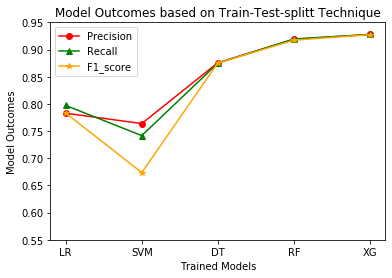

In [50]:
# Comparision of train test splitt classifiers

_=plt.plot(['LR','SVM','DT','RF','XG'],Precision,marker = 'o',color='red')
_=plt.plot(['LR','SVM','DT','RF','XG'],Recall,marker = '^',color='green')
_=plt.plot(['LR','SVM','DT','RF','XG'],F1_score,marker = '*',color='orange')
_=plt.xlabel('Trained Models')
_=plt.ylabel('Model Outcomes')
_=plt.ylim(0.55,0.95)
_=plt.legend(['Precision','Recall','F1_score'])
_=plt.title("Model Outcomes based on Train-Test-splitt Technique")

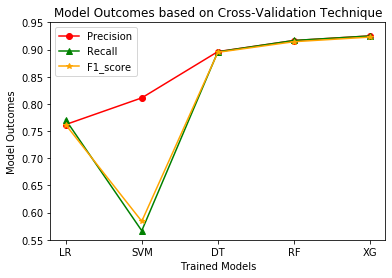

In [51]:
# Comparision of CV classifiers

_=plt.plot(['LR','SVM','DT','RF','XG'],Precision_cv,marker = 'o',color='red')
_=plt.plot(['LR','SVM','DT','RF','XG'],Recall_cv,marker = '^',color='green')
_=plt.plot(['LR','SVM','DT','RF','XG'],F1_score_cv,marker = '*',color='orange')
_=plt.xlabel('Trained Models')
_=plt.ylabel('Model Outcomes')
_=plt.ylim(0.55,0.95)
_=plt.legend(['Precision','Recall','F1_score'])
_=plt.title("Model Outcomes based on Cross-Validation Technique")

### Feature selection using SelectKBest and SelectFromModel

In [52]:
# From the result we can say that our data doesnt have any zero variance feature. 
# (i.e obviously all the data points doesnt have same vaues)

selector = VarianceThreshold()
x_train_remove_variance = selector.fit_transform(x_train_cv)
print(x_train_remove_variance.shape)

(960, 26)


In [53]:
# Using SelectKBest to choose top 6 features.

sel_f = SelectKBest(f_classif, k=6)
X_train_f = sel_f.fit_transform(x_train_cv, y_train_cv)
print(sel_f.get_support())
print()
print(x.columns[sel_f.get_support()])

sel_f_features = x.columns[sel_f.get_support()]

[False False False False  True False False False False  True False False
 False False False False  True False False False False False  True  True
  True False]

Index(['EmpDepartment', 'EmpEnvironmentSatisfaction',
       'EmpLastSalaryHikePercent', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [54]:
# Using SelectKBest to choose top 6 features.

sel_mutual = SelectKBest(mutual_info_classif, k=6)
X_train_mutual = sel_mutual.fit_transform(x_train_cv, y_train_cv)
print(sel_mutual.get_support())
print()
print(x.columns[sel_mutual.get_support()])

sel_mutual_features = x.columns[sel_mutual.get_support()]

[False False False False False  True False False False  True False False
 False False False False  True False False False False  True  True  True
 False False]

Index(['EmpJobRole', 'EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion'],
      dtype='object')


> By using SelectFromModel its clear that the accuracy is constant till 6 features and then its getting changed. Hence we will consider only these 6 features as imp features and will neglect others as those are getting overfitted to the model

In [55]:
# Using SelectFromModel to choose top features.

for value in imp_XG.values:
    # selecting features using threshold
    selection = SelectFromModel(model, threshold=value, prefit=True)
    x_train_new = selection.transform(x_train_cv)
 
    print('************************************************')
    print('Number of Features :',x_train_new.shape[1])
    # training model
    selection_model = XGBClassifier()
    selection_model.fit(x_train_new , y_train_cv)
    
    # evaluating model
    x_test_new = selection.transform(x_test_cv)
    pred_y = selection_model.predict(x_test_new)
    predictions = [round(value) for value in pred_y]
    accuracy = accuracy_score(y_test_cv, predictions)
    print("importance value=%.3f,  Accuracy: %.2f%%" % (value, accuracy*100.0))

************************************************
Number of Features : 1
importance value=0.161,  Accuracy: 78.33%
************************************************
Number of Features : 2
importance value=0.149,  Accuracy: 80.42%
************************************************
Number of Features : 3
importance value=0.142,  Accuracy: 88.75%
************************************************
Number of Features : 4
importance value=0.090,  Accuracy: 92.08%
************************************************
Number of Features : 5
importance value=0.081,  Accuracy: 92.50%
************************************************
Number of Features : 6
importance value=0.033,  Accuracy: 92.92%
************************************************
Number of Features : 7
importance value=0.026,  Accuracy: 92.92%
************************************************
Number of Features : 8
importance value=0.025,  Accuracy: 92.50%
************************************************
Number of Features : 9
importance value

In [56]:
SelectFromModel_features = [x.columns[i] for i in imp_XG[:6].index]
imp_XG[:6]

,0
16,0.160689
9,0.149069
23,0.141621
4,0.089870
22,0.080579
20,0.033168


### Building optimised model with less number of features

> <br>1. As our model has less correlated features w.r.t target variable, we are opting for univariate and tree based feature selection models. <br><br>2. Through univariate we have obtained and stored important features as sel_f_features, sel_mutual_features, SelectFromModel_features. <br><br>3. Through tree based models we have obtained and stored important features as DT_features, RF_features, XG_features. <br><br>4. Taking into consideration of all these important features we are analysing the impact on our target variable and are choosing the minimal features for final modelling. <br><br>5. Of these unique features `sel_f_features` are been choosen as the relevant important features, based on precison , recall, f1 score and also the number of misclassifications taken into the consideration.

In [57]:
# comparing imp features. We can notice that DT_features, XG_features, SelectFromModel_features are same.

features = [DT_features,RF_features,XG_features,sel_f_features,sel_mutual_features,SelectFromModel_features]
Unique_features = [RF_features,XG_features,sel_f_features,sel_mutual_features]
Imp_features = set([each for i in Unique_features for each in i])

for i in features :
    print(i,'\n')

['EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent', 'YearsSinceLastPromotion', 'ExperienceYearsInCurrentRole', 'EmpDepartment', 'EmpWorkLifeBalance'] 

['EmpLastSalaryHikePercent', 'EmpEnvironmentSatisfaction', 'YearsSinceLastPromotion', 'ExperienceYearsInCurrentRole', 'EmpJobRole', 'EmpHourlyRate'] 

['EmpLastSalaryHikePercent', 'EmpEnvironmentSatisfaction', 'YearsSinceLastPromotion', 'EmpDepartment', 'ExperienceYearsInCurrentRole', 'EmpWorkLifeBalance'] 

Index(['EmpDepartment', 'EmpEnvironmentSatisfaction',
       'EmpLastSalaryHikePercent', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object') 

Index(['EmpJobRole', 'EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion'],
      dtype='object') 

['EmpLastSalaryHikePercent', 'EmpEnvironmentSatisfaction', 'YearsSinceLastPromotion', 'EmpDepartment', 'ExperienceYear

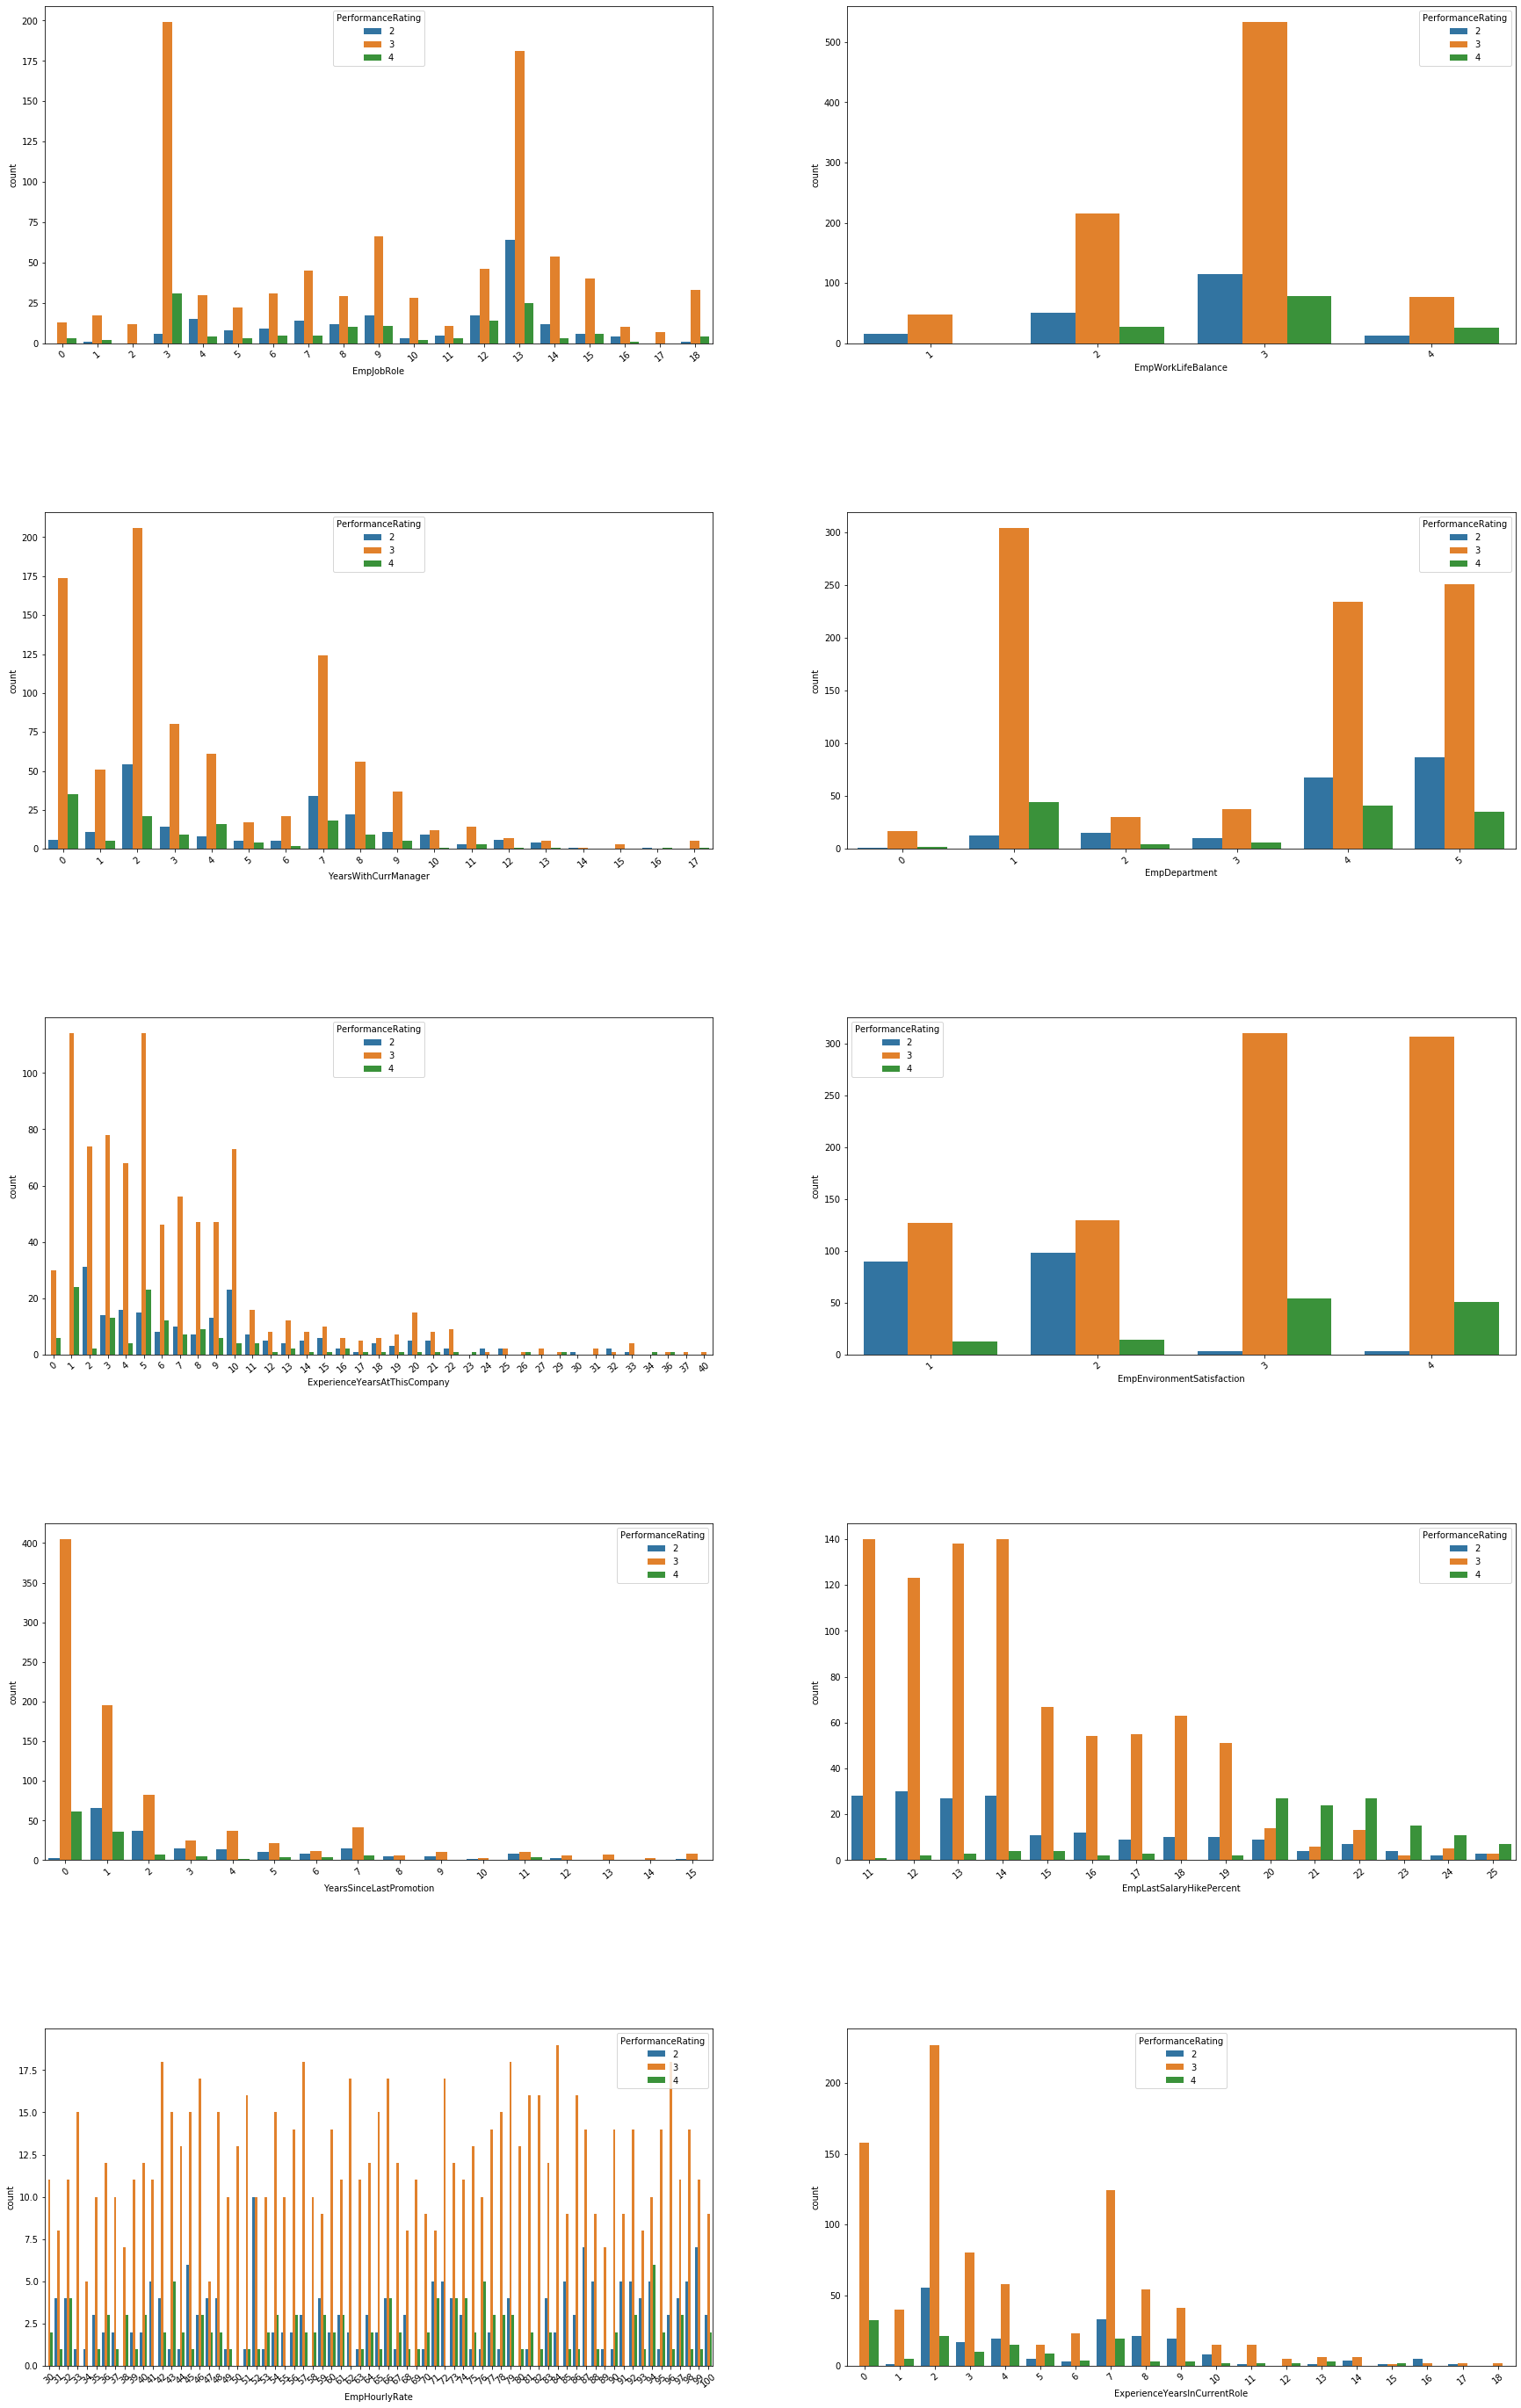

In [58]:
# Comparision of important features
performance_analysis(Imp_features)

In [59]:
min_data = [x.loc[:,i] for i in Unique_features]

In [60]:
min_data[2].head()

,EmpDepartment,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,5,4,12,7,0,8
1,5,4,12,7,1,7
2,5,4,21,13,1,12
3,3,2,15,6,12,6
4,5,1,14,2,2,2


In [61]:
# We are creating training and testing data using stratified shuffle splitt for the new dataframe

def data_split(data):
    cv = StratifiedShuffleSplit(n_splits=5,test_size=0.2, random_state=1)
    for train, test in cv.split(data,y):
        x_train_6, x_test_6 = data.iloc[train], data.iloc[test] 
        y_train_6, y_test_6 = y.iloc[train], y.iloc[test]
    return x_train_6, x_test_6,y_train_6, y_test_6 


In [62]:
# We are training the model and doing the prediction with optimized features (based on feature selection)

x_train_0, x_test_0,y_train_0, y_test_0 = data_split(min_data[0]) 
x_train_1, x_test_1,y_train_1, y_test_1 = data_split(min_data[1]) 
x_train_2, x_test_2,y_train_2, y_test_2 = data_split(min_data[2]) 
x_train_3, x_test_3,y_train_3, y_test_3 = data_split(min_data[3]) 

In [63]:
def minmimized_model(x_train, x_test,y_train, y_test):
    
    model=XGBClassifier(random_state=1)
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)

    print("Accuracy :",accuracy_score(y_test,y_predict))
    print("Precision:",precision_score(y_test, y_predict,average='weighted'))
    print(classification_report(y_test,y_predict))
    return pd.crosstab(y_test,y_predict)

In [64]:
# Training the model with RF_features
minmimized_model(x_train_0, x_test_0,y_train_0, y_test_0)

Accuracy : 0.9291666666666667
Precision: 0.9285742156394329
              precision    recall  f1-score   support

           2       0.91      0.82      0.86        39
           3       0.93      0.97      0.95       175
           4       0.91      0.81      0.86        26

    accuracy                           0.93       240
   macro avg       0.92      0.87      0.89       240
weighted avg       0.93      0.93      0.93       240



col_0,2,3,4
PerformanceRating,,,
2,32,7,0
3,3,170,2
4,0,5,21


In [65]:
# Training the model with XG_features
minmimized_model(x_train_1, x_test_1,y_train_1, y_test_1)

Accuracy : 0.9291666666666667
Precision: 0.9299776591107237
              precision    recall  f1-score   support

           2       0.97      0.77      0.86        39
           3       0.93      0.98      0.96       175
           4       0.88      0.81      0.84        26

    accuracy                           0.93       240
   macro avg       0.92      0.85      0.88       240
weighted avg       0.93      0.93      0.93       240



col_0,2,3,4
PerformanceRating,,,
2,30,8,1
3,1,172,2
4,0,5,21


In [66]:
# Training the model with sel_f_features
minmimized_model(x_train_2, x_test_2,y_train_2, y_test_2)

Accuracy : 0.9291666666666667
Precision: 0.9298629981884059
              precision    recall  f1-score   support

           2       0.97      0.79      0.87        39
           3       0.93      0.98      0.95       175
           4       0.88      0.81      0.84        26

    accuracy                           0.93       240
   macro avg       0.92      0.86      0.89       240
weighted avg       0.93      0.93      0.93       240



col_0,2,3,4
PerformanceRating,,,
2,31,8,0
3,1,171,3
4,0,5,21


In [67]:
# Training the model with sel_mutual_features
minmimized_model(x_train_3, x_test_3,y_train_3, y_test_3)

Accuracy : 0.9291666666666667
Precision: 0.9288225867269984
              precision    recall  f1-score   support

           2       0.94      0.82      0.88        39
           3       0.93      0.97      0.95       175
           4       0.88      0.81      0.84        26

    accuracy                           0.93       240
   macro avg       0.92      0.87      0.89       240
weighted avg       0.93      0.93      0.93       240



col_0,2,3,4
PerformanceRating,,,
2,32,7,0
3,2,170,3
4,0,5,21


### Tuning Hyperperameters of the model

In [68]:
final_model=XGBClassifier(random_state=1)
final_model.fit(x_train_2,y_train_2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [69]:
# We are measuring the cross validation scores based on multiple scoring parameters

scoring = ['precision_macro', 'recall_macro']
scores_6 = cross_validate(final_model, min_data[2], y, cv=cv,scoring=scoring)  

print(scores_6.keys())
print("cross-validation scores : " ,scores_6['test_precision_macro'])
print("Accuracy (deviation) : %0.2f (+/- %0.2f)"
      % (scores_6['test_precision_macro'].mean(), scores_6['test_precision_macro'].std() * 2))

dict_keys(['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro'])
cross-validation scores :  [0.89384952 0.91269152 0.83980676 0.89979294 0.92436594]
Accuracy (deviation) : 0.89 (+/- 0.06)


In [70]:
parameters = {'max_depth': [1,2,3,4],'gamma': [0.1,1,1.5],'learning_rate':[0.001,0.01,0.1,0.5,0.75,1] }

grid = GridSearchCV(final_model, param_grid=parameters,cv=cv, n_jobs=-1,scoring=scoring,refit='precision_macro')
grid.fit(x_train_2,y_train_2)
y_predict_grid = grid.predict(x_test_2)

In [71]:
# We are looking at accuracy and best parameters of grid search

print("best score :" ,grid.best_score_)
print(grid.best_params_)
print("Accuracy :",accuracy_score(y_test_2,y_predict_grid))
print("Precision:",precision_score(y_test_2, y_predict_grid,average='weighted'))
print(classification_report(y_test_2,y_predict_grid))
pd.crosstab(y_test_2,y_predict_grid)

best score : 0.916562218782785
{'gamma': 1.5, 'learning_rate': 0.75, 'max_depth': 2}
Accuracy : 0.925
Precision: 0.9256112600372111
              precision    recall  f1-score   support

           2       0.97      0.79      0.87        39
           3       0.92      0.98      0.95       175
           4       0.87      0.77      0.82        26

    accuracy                           0.93       240
   macro avg       0.92      0.85      0.88       240
weighted avg       0.93      0.93      0.92       240



col_0,2,3,4
PerformanceRating,,,
2,31,8,0
3,1,171,3
4,0,6,20
